In [1]:
# Deep learning model to forecast the air quality in Beijing at the Aotizhongxin station
# Import time module
from datetime import datetime as dt

# Record start time
start = dt.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/Beijing_air_quality_Aotizhongxin.csv")

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [5]:
df.shape

(35064, 18)

In [6]:
cols_to_keep = ['No', 'year', 'month', 'day', 'hour', 'NO2', 'TEMP']

df = df[cols_to_keep]
df.head()

,No,year,month,day,hour,NO2,TEMP
0,1,2013,3,1,0,7.0,-0.7
1,2,2013,3,1,1,7.0,-1.1
2,3,2013,3,1,2,10.0,-1.1
3,4,2013,3,1,3,11.0,-1.4
4,5,2013,3,1,4,12.0,-2.0


In [7]:
df.shape

(35064, 7)

In [8]:
df[['year', 'month', 'day', 'hour']].dtypes

year     int64
month    int64
day      int64
hour     int64
dtype: object

In [9]:
# Convert columns for 'year', 'month', 'day', 'hour' to single datetime field

df["date_time"] = pd.to_datetime(df.year.astype("string") + "-" + df.month.astype("string").str.zfill(2) +"-" + 
                                 df.day.astype("string").str.zfill(2) + 
                                  " "+ df.hour.astype("string").str.zfill(2) +':00'+':00' , format="%Y-%m-%d %H:%M:%S")
df.head()

,No,year,month,day,hour,NO2,TEMP,date_time
0,1,2013,3,1,0,7.0,-0.7,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,-1.1,2013-03-01 01:00:00
2,3,2013,3,1,2,10.0,-1.1,2013-03-01 02:00:00
3,4,2013,3,1,3,11.0,-1.4,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,-2.0,2013-03-01 04:00:00


In [10]:
# drop columns for 'year', 'month', 'day', 'hour' and reorganize dataframe
cols_to_drop = ['year', 'month', 'day', 'hour']
df = df.drop(cols_to_drop, axis=1)

df = df[['No', 'date_time', 'NO2', 'TEMP']]
df.head()

,No,date_time,NO2,TEMP
0,1,2013-03-01 00:00:00,7.0,-0.7
1,2,2013-03-01 01:00:00,7.0,-1.1
2,3,2013-03-01 02:00:00,10.0,-1.1
3,4,2013-03-01 03:00:00,11.0,-1.4
4,5,2013-03-01 04:00:00,12.0,-2.0


In [11]:
# Check for NaN values
df.isnull().values.any()

True

In [12]:
# Count all Nan values
df.isnull().any(axis=1).sum()

1043

In [13]:
# Count Nan values in the two fields of interest
temp_nan_values = df['TEMP'].isnull().sum()
no2_nan_values = df['NO2'].isnull().sum()

print(f'Temperarture missing values: {temp_nan_values}')
print(f'Nitrogen concentration missing values: {no2_nan_values}')

Temperarture missing values: 20
Nitrogen concentration missing values: 1023


In [14]:
# Impute NaNs with mean of the respective fields and check if any Nans persist in the dataframe.
df['TEMP'].fillna(int(df['TEMP'].mean()), inplace=True)
df['NO2'].fillna(int(df['NO2'].mean()), inplace=True)

df.isnull().any(axis=1).sum()

0

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0,8766.75,17532.5,26298.25,35064.0
NO2,35064.0,59.296910,36.570776,2.0,31.00,55.0,81.00,290.0
TEMP,35064.0,13.584274,11.395854,-16.8,3.10,14.5,23.30,40.5


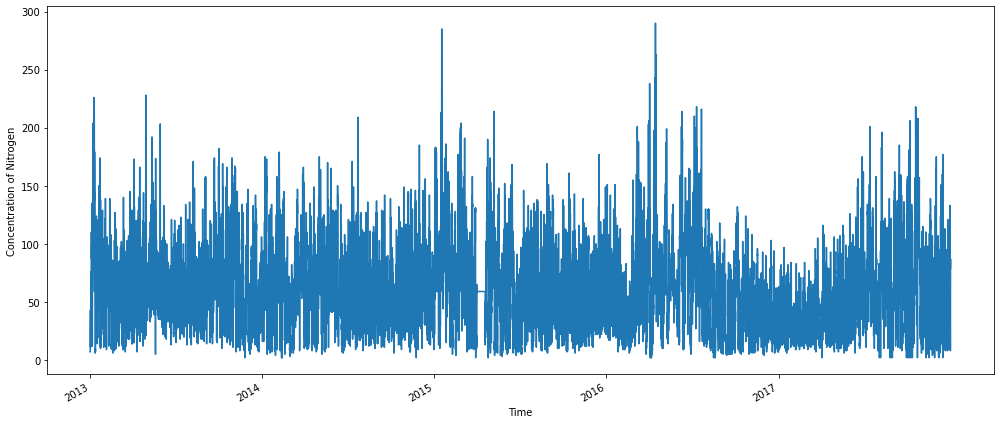

In [16]:
# Hourly concentration of nitrogen dioxide (NO2) over the entire dataset (Jan 01, 2013, to Dec 31, 2017)
# Observe yearly seasonality

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['NO2'])
ax.set_xlabel('Time')
ax.set_ylabel('Concentration of Nitrogen')

plt.xticks(np.arange(0, 35064, (35064/5)), [2013, 2014, 2015, 2016, 2017])

fig.autofmt_xdate()
plt.tight_layout()

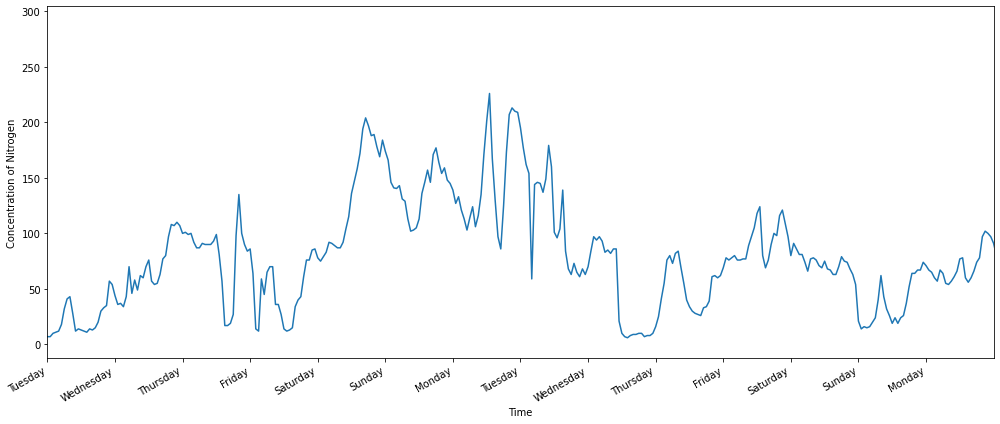

In [17]:
# Hourly concentration of nitrogen dioxide (NO2) for the first 336 pts(2 weeks)
# Observe daily seasonality

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df['NO2'])
ax.set_xlabel('Time')
ax.set_ylabel('Concentration of Nitrogen')

plt.xticks(np.arange(0, 336, 24), ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
                                    'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'])
                                   
plt.xlim(0, 336)
fig.autofmt_xdate()
plt.tight_layout()

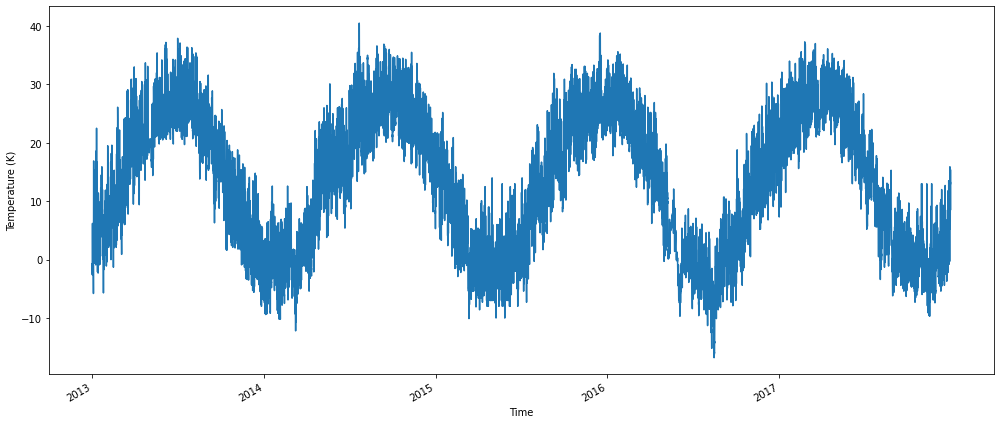

In [18]:
# Hourly temperature (in Kelvin) over the entire dataset (Jan 01, 2013, to Dec 31, 2017)
# Observe yearly seasonality

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['TEMP'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(0, 35064, (35064/5)), [2013, 2014, 2015, 2016, 2017])

fig.autofmt_xdate()
plt.tight_layout()

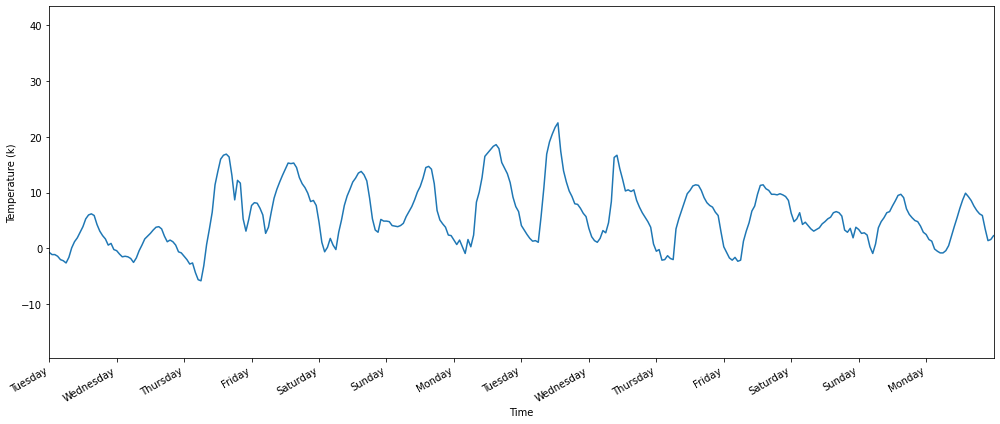

In [19]:
# Hourly temperature (in Kelvin) for the first 336 pts(2 weeks)
# Observe daily seasonality

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df['TEMP'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (k)')

plt.xticks(np.arange(0, 336, 24), ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
                                    'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'])
                                   
plt.xlim(0, 336)
fig.autofmt_xdate()
plt.tight_layout()

In [20]:
# Encode time as a usable feature for our deep learning models
timestamp_s =  pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

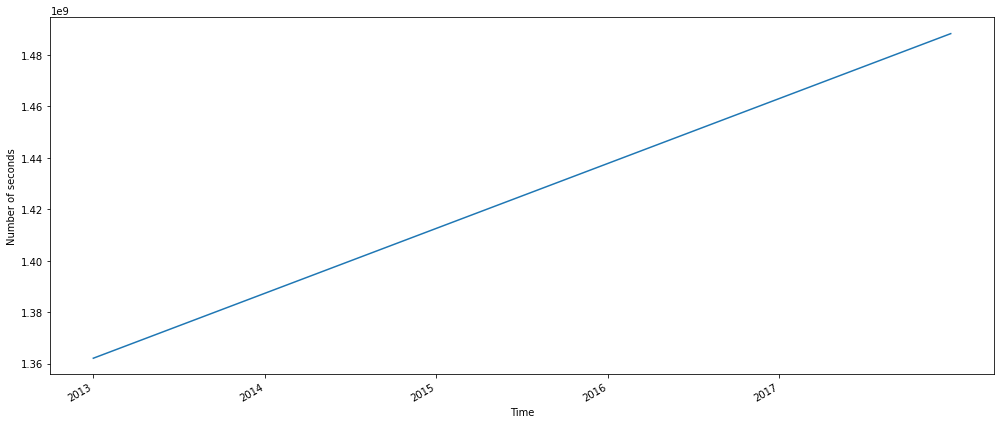

In [21]:
# Number of seconds expressing each date in the dataset
# observe that we loose the cyclical nature of time since the number of seconds increase linearly

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(timestamp_s)
ax.set_xlabel('Time')
ax.set_ylabel('Number of seconds')

plt.xticks(np.arange(0, 35064, (35064/5)), [2013, 2014, 2015, 2016, 2017])

fig.autofmt_xdate()
plt.tight_layout()

In [22]:
# We apply a transformation to recover the cyclical behavior of time.

# The timestamp is in seconds, so we must calculate the number of seconds in a day before applying the sine transformation.
day = 24 * 60 * 60

# Application of the sine transformation. Notice that radians are used in the sine function
df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values

In [23]:
# Further, to distinguish between morning and afternoon, apply a cosine transformation to the timestamp in seconds
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

# Remove the date_time column
df = df.drop(['date_time'], axis=1)

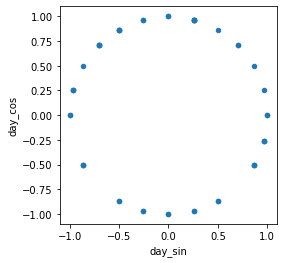

In [24]:
# Plot day_sin vs day_cos to see if the transformation worked

df.sample(50).plot.scatter('day_sin', 'day_cos').set_aspect('equal')

In [25]:
# Use 70:20:10 split for the train, validation, and test sets

n = len(df)

train_df = df[0 : int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Fit only on the training set
scaler = MinMaxScaler()
scaler.fit(train_df)

MinMaxScaler()

In [27]:
train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

In [28]:
# Save each set as a CSV file

train_df.to_csv('../data/train_ahx.csv')
val_df.to_csv('../data/val_ahx.csv')
test_df.to_csv('../data/test_ahx.csv')

In [29]:
# custom functions in DataWindow Class
from myDataWindow import DataWindow

In [30]:
# define single step model
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, 
                                train_df=train_df, 
                                val_df=val_df, 
                                test_df=test_df, 
                                label_columns=['NO2'])             

In [31]:
# Multi-step models, we’ll predict more than one timestep into the future
wide_window = DataWindow(input_width=24, label_width=24, shift=1, 
                         train_df = train_df,
                         val_df = val_df,
                         test_df = test_df,
                         label_columns=['NO2'])

In [32]:
# Generate a dictionary with the name and index of each column in the training set
column_indices = {name: i for i, name in enumerate(train_df.columns)}

In [33]:
from myBaseline import Baseline
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Pass the index of the target column in the Baseline class
baseline_last = Baseline(label_index=column_indices['NO2'])

# Compile the model to generate the predictions
# MSE is chosen as the loss function since it penalizes large errors and tends to yield better-fit models. 
# MAE is chosen as the evaluation metric due to its ease of interpretation
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [34]:
# Create a dictionary to hold the MAE of a model on the validation set.
val_performance = {}

# Create a dictionary to hold the MAE of a model on the test set.
performance = {}

# Store the MAE of the baseline on the validation set
val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)

# Store the MAE of the baseline on the test set
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

220/220 [==============================] - 10s 38ms/step - loss: 0.0015 - mean_absolute_error: 0.0237


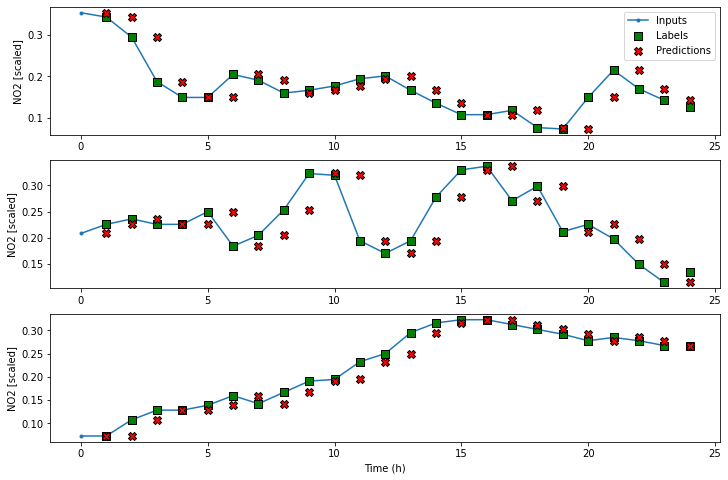

In [35]:
# visualize the predictions using the plot method of the DataWindow class.
wide_window.plot(baseline_last, plot_col='NO2')

In [36]:
print(performance['Baseline - Last'][1])

0.03180064260959625


In [37]:
# Multistep baseline models
multi_window = DataWindow(input_width=24, label_width=24, shift=24, 
                            train_df = train_df,
                            val_df = val_df,
                            test_df = test_df,                          
                            label_columns=['NO2'])

In [38]:
from myMultiStepLastBaseline import MultiStepLastBaseline

# Initialize the class and specify the target column
ms_baseline_last = MultiStepLastBaseline(label_index = column_indices['NO2'])
ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [39]:
ms_val_performance = {}
ms_performance = {}

ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

218/218 [==============================] - 3s 10ms/step - loss: 0.1914 - mean_absolute_error: 0.3303


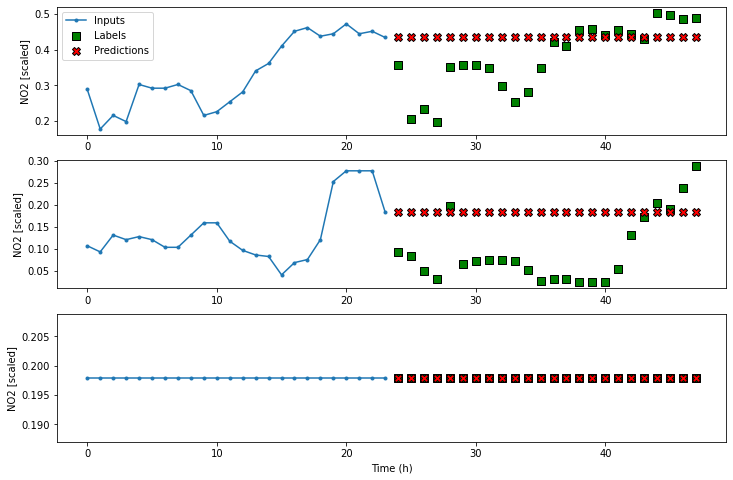

In [40]:
# visualize the predictions using the plot method of DataWindow
multi_window.plot(ms_baseline_last, plot_col='NO2')

In [41]:
# Print the baseline’s MAE
print(ms_performance['Baseline - Last'][1])

0.2572116255760193


In [42]:
# Build a second, better baseline by repeating the input sequence
from myRepeatBaseline import RepeatBaseline

# Initialize the baseline model and generate predictions (maintain the same loss function/evaluation metric)

ms_baseline_repeat = RepeatBaseline(label_index = column_indices['NO2'])
ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

218/218 [==============================] - 2s 9ms/step - loss: 0.1892 - mean_absolute_error: 0.3283


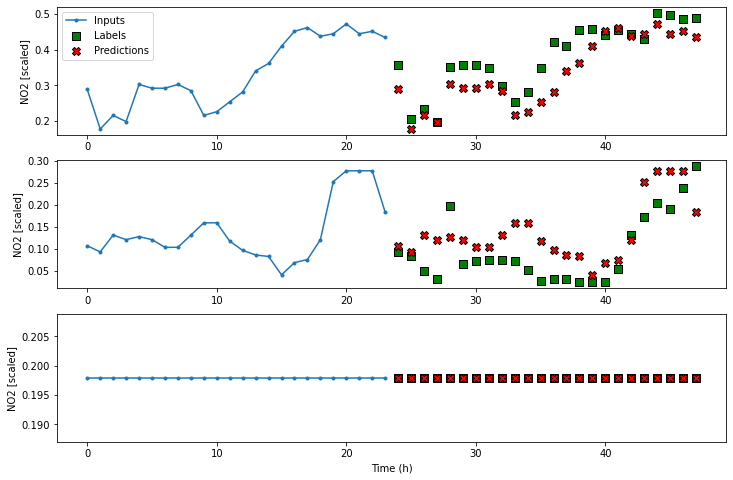

In [43]:
# Visualize the predictions using the plot method of DataWindow
multi_window.plot(ms_baseline_repeat, plot_col='NO2')

In [44]:
# Multi-output baseline model
# Notice that we pass in both TEMP and NO2, as those are our two targets for the multi-output model
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1,
                                    train_df = train_df,
                                    val_df = val_df,
                                    test_df = test_df, 
                                    label_columns=['TEMP','NO2'])

mo_wide_window = DataWindow(input_width = 24, label_width=24, shift=1,
                               train_df = train_df,
                               val_df = val_df,
                               test_df = test_df, 
                               label_columns=['TEMP','NO2'])

In [45]:
# Use the same Baseline class that we defined for the single-step model. 
# Note that this class can output the last known value for a list of targets.
# For multi-output model, we pass the indexes of the TEMP and NO2 columns

print(column_indices['NO2'])
print(column_indices['TEMP'])

1
2


In [46]:
mo_baseline_last = Baseline(label_index=[2, 1])
mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [47]:
mo_val_performance = {}
mo_performance = {}

mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

219/219 [==============================] - 3s 11ms/step - loss: 0.0010 - mean_absolute_error: 0.0205: 1s - loss: 0.0010 


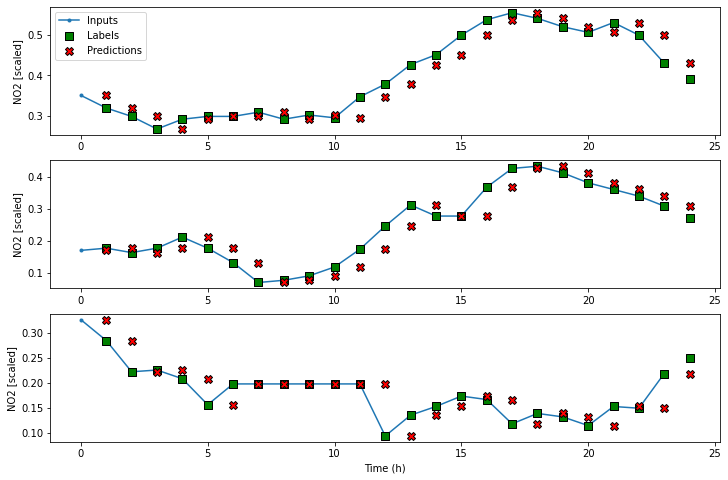

In [48]:
# Visualize the predictions against the actual values
# Predicting the last known value for NO2 concentration

mo_wide_window.plot(mo_baseline_last, plot_col='NO2')

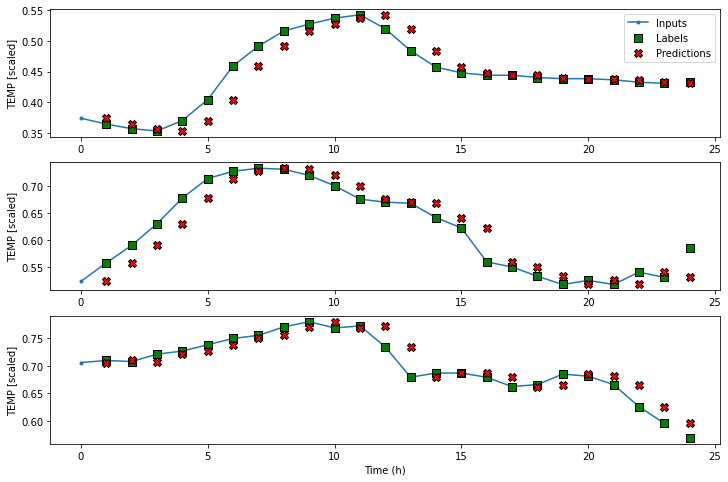

In [49]:
# To visualize the predictions for the temperature, specify the target in the plot method
# Predicting the last known value for the temperature.

mo_wide_window.plot(model=mo_baseline_last, plot_col='TEMP')

In [50]:
# Print the MAE of our baseline model
print(mo_performance['Baseline - Last'])

[0.0019200058886781335, 0.023927360773086548]


In [51]:
# Build linear model using Sequential model from keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# units = 1, since the model must output only one value
linear = Sequential([Dense(units = 1)])

In [52]:
# Train the model using compile_and_fit and store the performance to later compare it to the baseline.
from myDeepFunctions import compile_and_fit

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 12s 14ms/step - loss: 0.0492 - mean_absolute_error: 0.1728 - val_loss: 0.0336 - val_mean_absolute_error: 0.1698
Epoch 2/50
767/767 [==============================] - 10s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0561 - val_loss: 0.0020 - val_mean_absolute_error: 0.0320
Epoch 3/50
767/767 [==============================] - 10s 13ms/step - loss: 0.0021 - mean_absolute_error: 0.0309 - val_loss: 0.0014 - val_mean_absolute_error: 0.0237
Epoch 4/50
767/767 [==============================] - 9s 12ms/step - loss: 0.0021 - mean_absolute_error: 0.0297 - val_loss: 0.0014 - val_mean_absolute_error: 0.0241
Epoch 5/50
767/767 [==============================] - 10s 13ms/step - loss: 0.0021 - mean_absolute_error: 0.0297 - val_loss: 0.0014 - val_mean_absolute_error: 0.0247
Epoch 6/50
767/767 [==============================] - 9s 12ms/step - loss: 0.0021 - mean_absolute_error: 0.0297 - val_loss: 0.0014 - val_mean_absolute_error: 0.0234
Epoch 

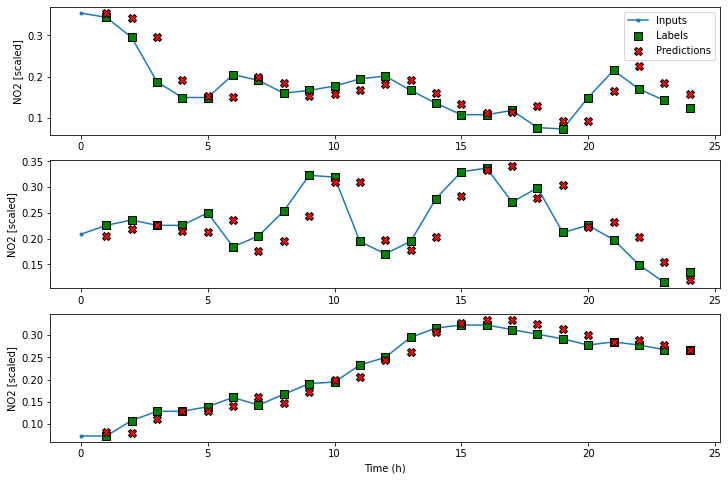

In [53]:
# Visualize the predictions of our linear model using the plot method of the wide_window
wide_window.plot(linear, plot_col='NO2')

In [54]:
# Print the MAE of our linear model
print(performance['Linear'][1])

0.03211510181427002


In [55]:
# Implementing a multi-step linear model

#Initializing the weights to 0 makes training slightly faster
ms_linear = Sequential([Dense(1, kernel_initializer = tf.initializers.zeros)])

history = compile_and_fit(ms_linear, multi_window)

ms_val_performance['Linear'] = ms_linear.evaluate(multi_window.val)
ms_performance['Linear'] = ms_linear.evaluate(multi_window.test, verbose=0)

Epoch 1/50
766/766 [==============================] - 14s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0962 - val_loss: 0.0119 - val_mean_absolute_error: 0.0926
Epoch 2/50
766/766 [==============================] - 13s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0874 - val_loss: 0.0098 - val_mean_absolute_error: 0.0818
Epoch 3/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0867 - val_loss: 0.0097 - val_mean_absolute_error: 0.0808
Epoch 4/50
766/766 [==============================] - 13s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0866 - val_loss: 0.0098 - val_mean_absolute_error: 0.0812
Epoch 5/50
766/766 [==============================] - 12s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0866 - val_loss: 0.0093 - val_mean_absolute_error: 0.0787
Epoch 6/50
766/766 [==============================] - 11s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0866 - val_loss: 0.0097 - val_mean_absolute_error: 0.0806
Epoc

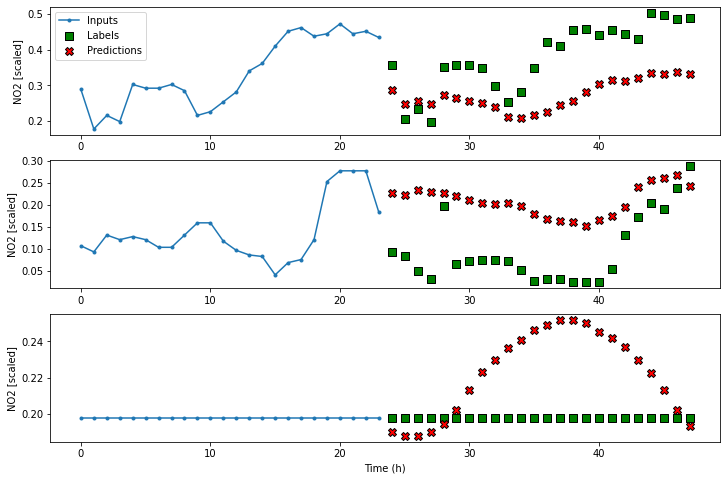

In [56]:
multi_window.plot(ms_linear, plot_col='NO2')

In [57]:
print(ms_performance['Linear'][1])

0.10941141098737717


In [58]:
# Implementing a multi-output linear model

# We set units equal to the number of targets we are predicting in the output layer

mo_linear = Sequential(Dense(units=2))

history = compile_and_fit(mo_linear, mo_single_step_window)

mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 12s 14ms/step - loss: 0.1273 - mean_absolute_error: 0.2720 - val_loss: 0.0709 - val_mean_absolute_error: 0.2108
Epoch 2/50
767/767 [==============================] - 12s 16ms/step - loss: 0.0264 - mean_absolute_error: 0.1268 - val_loss: 0.0168 - val_mean_absolute_error: 0.1008
Epoch 3/50
767/767 [==============================] - 12s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0731 - val_loss: 0.0056 - val_mean_absolute_error: 0.0617
Epoch 4/50
767/767 [==============================] - 13s 17ms/step - loss: 0.0033 - mean_absolute_error: 0.0458 - val_loss: 0.0024 - val_mean_absolute_error: 0.0397
Epoch 5/50
767/767 [==============================] - 10s 13ms/step - loss: 0.0019 - mean_absolute_error: 0.0317 - val_loss: 0.0013 - val_mean_absolute_error: 0.0258
Epoch 6/50
767/767 [==============================] - 11s 15ms/step - loss: 0.0014 - mean_absolute_error: 0.0248 - val_loss: 9.4792e-04 - val_mean_absolute_error: 0.0201


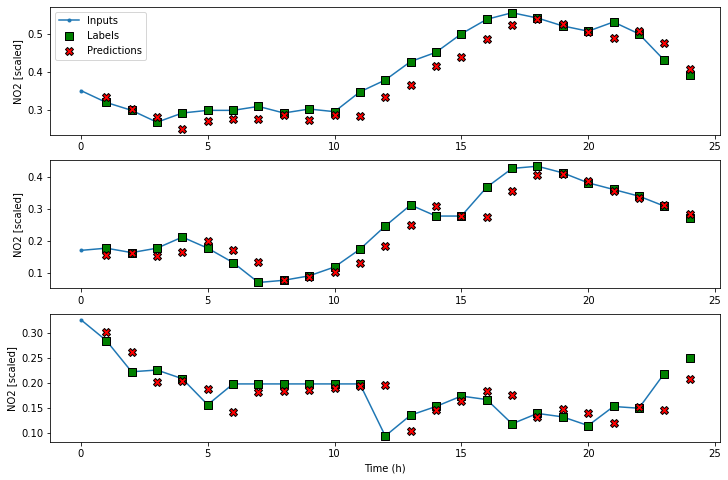

In [59]:
mo_wide_window.plot(mo_linear, plot_col='NO2')

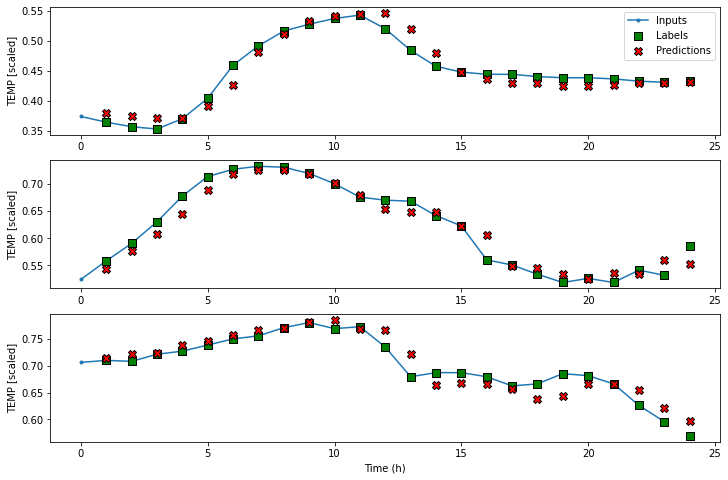

In [60]:
mo_wide_window.plot(mo_linear, plot_col='TEMP')

In [61]:
print(mo_performance['Linear'][1])

0.023047998547554016


In [62]:
# Implement a deep neural network as a single-step model

dense = Sequential([
    # First hidden layer with 64 neurons. Specify the activation function to be ReLU
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    # The output layer has only one neuron, as we output only one value
    Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 13s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0387 - val_loss: 0.0015 - val_mean_absolute_error: 0.0251
Epoch 2/50
767/767 [==============================] - 11s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0310 - val_loss: 0.0016 - val_mean_absolute_error: 0.0285
Epoch 3/50
767/767 [==============================] - 11s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0307 - val_loss: 0.0025 - val_mean_absolute_error: 0.0379
Epoch 4/50
767/767 [==============================] - 11s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0309 - val_loss: 0.0014 - val_mean_absolute_error: 0.0245loss:
Epoch 5/50
767/767 [==============================] - 10s 13ms/step - loss: 0.0021 - mean_absolute_error: 0.0305 - val_loss: 0.0017 - val_mean_absolute_error: 0.0285
Epoch 6/50
767/767 [==============================] - 11s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0303 - val_loss: 0.0014 - val_mean_absolute_error: 0.0241

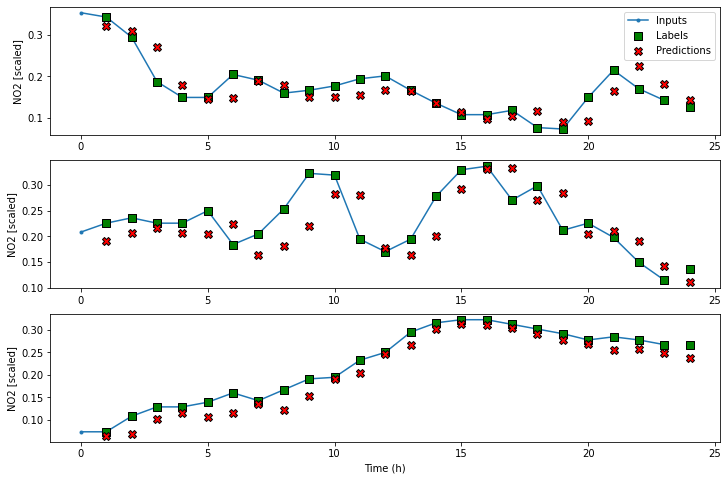

In [63]:
wide_window.plot(dense, plot_col='NO2')

In [64]:
print(performance['Dense'][1])

0.03715420141816139


In [65]:
print(val_performance)
print(performance)

{'Baseline - Last': [0.0014720889739692211, 0.023720253258943558], 'Linear': [0.0014058881206437945, 0.024276655167341232], 'Dense': [0.0015577811282128096, 0.026440856978297234]}
{'Baseline - Last': [0.003231466980651021, 0.03180064260959625], 'Linear': [0.0030916198156774044, 0.03211510181427002], 'Dense': [0.0034063118509948254, 0.03715420141816139]}


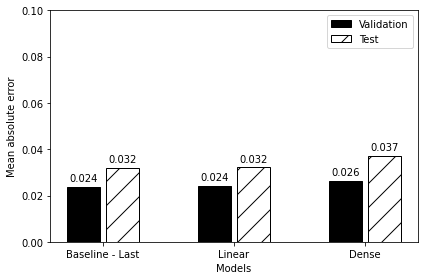

In [66]:
# Compare the MAEs of the DNN linear model and the baseline

mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y = value + 0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y = value + 0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

In [67]:
#Implementing a deep neural network as a multi-step model

ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros)
])

# compile, train the model, and save its performance
history = compile_and_fit(ms_dense, multi_window)

ms_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
ms_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
766/766 [==============================] - 21s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0885 - val_loss: 0.0113 - val_mean_absolute_error: 0.0868
Epoch 2/50
766/766 [==============================] - 18s 23ms/step - loss: 0.0124 - mean_absolute_error: 0.0854 - val_loss: 0.0091 - val_mean_absolute_error: 0.0751
Epoch 3/50
766/766 [==============================] - 18s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0851 - val_loss: 0.0092 - val_mean_absolute_error: 0.0755- loss: 0.0122 - mean_absolute_error: 0. - ETA: 2s - l - ETA: 0s - loss: 0.0123 - mean_absolute_error: 0.08
Epoch 4/50
766/766 [==============================] - 18s 23ms/step - loss: 0.0123 - mean_absolute_error: 0.0849 - val_loss: 0.0089 - val_mean_absolute_error: 0.0731
Epoch 5/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0846 - val_loss: 0.0106 - val_mean_absolute_error: 0.0820
Epoch 6/50
766/766 [==============================] - 19s 25ms/

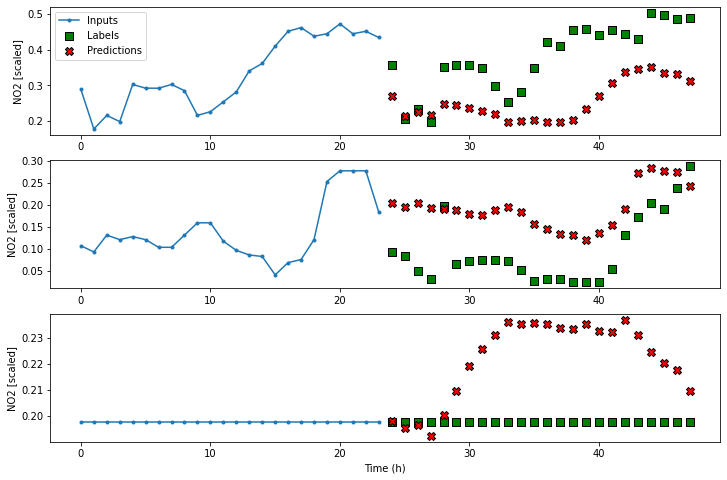

In [68]:
multi_window.plot(ms_dense, plot_col='NO2')

In [69]:
print(ms_performance['Dense'][1])

0.11240197718143463


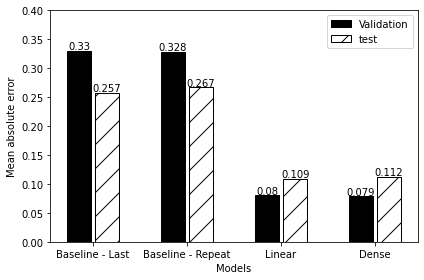

In [70]:
ms_mae_val = [v[1] for v in ms_val_performance.values()]
ms_mae_test = [v[1] for v in ms_performance.values()]

x = np.arange(len(ms_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=ms_performance.keys())

plt.legend(loc='best')
plt.tight_layout()

In [71]:
# Implement a deep neural network as a multi-output model
mo_dense = Sequential([
    Dense(units=64, activation = 'relu'),
    Dense(units=64, activation = 'relu'),
    # The output layer has two neurons, since we are forecasting two targets
    Dense(units=2)
])

history = compile_and_fit(mo_dense, mo_single_step_window)

mo_val_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.val)
mo_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 14s 16ms/step - loss: 0.0039 - mean_absolute_error: 0.0336 - val_loss: 0.0014 - val_mean_absolute_error: 0.0257
Epoch 2/50
767/767 [==============================] - 11s 14ms/step - loss: 0.0013 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_mean_absolute_error: 0.0234
Epoch 3/50
767/767 [==============================] - 11s 15ms/step - loss: 0.0013 - mean_absolute_error: 0.0229 - val_loss: 0.0013 - val_mean_absolute_error: 0.0251
Epoch 4/50
767/767 [==============================] - 11s 14ms/step - loss: 0.0013 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_mean_absolute_error: 0.0250
Epoch 5/50
220/220 [==============================] - 2s 9ms/step - loss: 0.0012 - mean_absolute_error: 0.0234


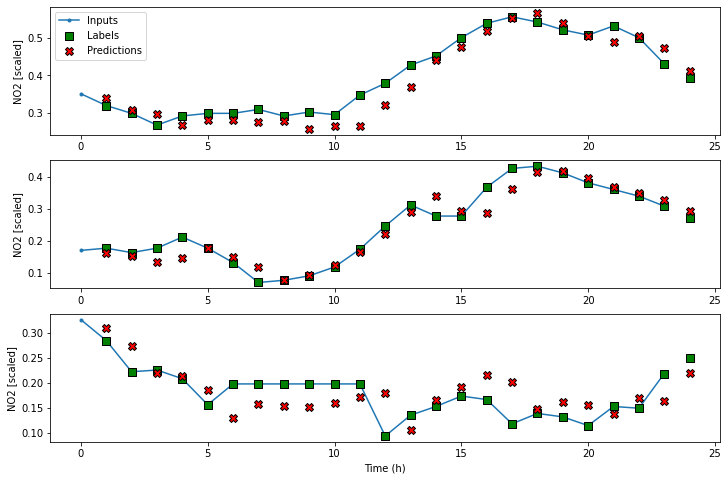

In [72]:
mo_wide_window.plot(mo_dense, plot_col='NO2')

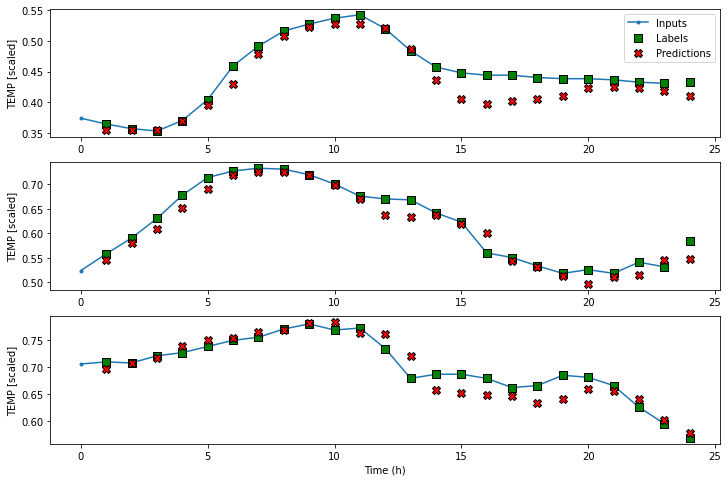

In [73]:
mo_wide_window.plot(mo_dense, plot_col='TEMP')

In [74]:
print(mo_performance['Dense'][1])

0.02835308015346527


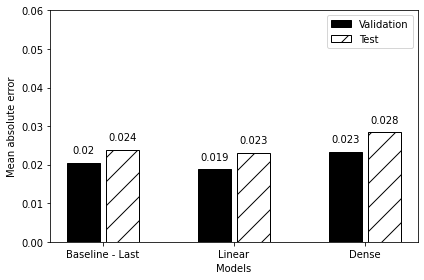

In [75]:
mo_mae_val = [v[1] for v in mo_val_performance.values()]
mo_mae_test = [v[1] for v in mo_performance.values()]

x = np.arange(len(mo_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels = mo_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

In [76]:
# Record end time

end = dt.now()
elapsed = end - start

print("The program took: %02d:%02d:%02d:%02d" % (elapsed.days, elapsed.seconds // 3600, elapsed.seconds // 60 % 60, elapsed.seconds % 60))

The program took: 00:00:16:03
